Есть три датафрейма сервиса аренды самокатов GoFast. Данные о пользователях из нескольких городов, а также об их поездках. Пользователи сервиса пользуются мобильным приложением по подписке, а также без подписки. 
Цель - проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

План работы:

1.Загрузка данных

2.Предобработка данных

3.Исследовательский анализ данных

4.Объединение данных

5.Подсчёт выручки

6.Проверка гипотез

7.Распределения (необязательное задание)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import shapiro, ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu, binom, norm, levene

#### Шаг 1. Загрузка данных

1.1 Загрузим данные из CSV-файлов в датафреймы

In [2]:
# Загрузим данные из CSV-файлов
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

1.2 Выведим первые строки каждого датафрейма и изучим общую инф по каждому

In [ ]:
# Распечатаем первые строки датафрейма users
users.head()

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra


In [5]:
# Общая информация о датафрейме users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Размер датафрейма users: 1565 строк (от индекса 0 до 1564) и 5 столбцов.
В датафрейме нет пропущенных значений (Non-Null Count для всех столбцов равен 1565).
Два столбца user_id и age имеют числовой тип данных (int64).
Три столбца name, city и subscription_type имеют строковый тип данных (object).

In [6]:
# Распечатаем первые строки датафрейма rides
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
# Общая информация о датафрейме rides
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Размер датафрейма rides: 18068 строк (от индекса 0 до 18067) и 4 столбца.
В датафрейме нет пропущенных значений (Non-Null Count для всех столбцов равен 18068).
Два столбца имеют числовой тип данных:
user_id — целочисленный (int64),
distance и duration — вещественные (float64).
Столбец date имеет строковый тип данных (object), это указывает на то, что даты записаны в текстовом формате.

In [8]:
# Распечатаем первые строки датафрейма subscriptions
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
# Общая информация о датафрейме subscriptions
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Размер датафрейма subscriptions: 2 строки (от индекса 0 до 1) и 4 столбца .
В датафрейме нет пропущенных значений (Non-Null Count для всех столбцов равен 2), представлены 2 типа подписки: ultra (ультра) и free (бесплатная).
Три столбца имеют числовой тип данных (int64): minute_price, start_ride_price, subscription_fee.
Один столбец (subscription_type) имеет строковый тип данных (object), что указывает на категориальные значения.

#### Шаг 2. Предобработка данных

2.1 Приведем столбец date в датафрейме rides к типу даты pandas - типу datetime.

In [10]:
# Приведем столбец date к типу datetime.
rides['date'] = pd.to_datetime(rides['date'])

Не проверив данные за период и в самом деле можно упустить важный момент.
Выведим на экран самую раннюю дату и самую позднюю, чтобы понимать период и как в будущем сокращать даты. 

In [11]:
# Проверим минимальную и максимальную дату
print("Минимальная дата:", rides['date'].min())
print("Максимальная дата:", rides['date'].max())

Минимальная дата: 2021-01-01 00:00:00
Максимальная дата: 2021-12-30 00:00:00


In [ ]:
rides['date'].dt.year.unique()

array([2021])


Так как все даты находятся в пределах одного года (2021), то логику отображения месяцев предлагаю оставить прежней.  

2.2 Создадим в датафрейме rides новый столбец 'month' с номером месяца

In [13]:
# Создадим новый столбец 'month' с номером месяца
rides['month'] = rides['date'].dt.month

# Выведим первые строки для проверки
print(rides[['date', 'month']].head())

        date  month
0 2021-01-01      1
1 2021-01-18      1
2 2021-04-20      4
3 2021-08-11      8
4 2021-08-28      8


Теперь в новом столбце 'month' указаны соответствующие номера месяца. 

2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах. 

In [14]:
# Проверим в датафрейме users наличие дубликатов
users.duplicated().sum()

31

В датафрейме users обнаружено 31 полный дубликат строк. Дубликаты могут исказить результаты анализа.

In [15]:
# Удалим дубликаты в датафрейме users
users = users.drop_duplicates()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, удалили дубликаты в таблице пользователей.</font>

In [16]:
# Проверим датафрейм users после удаления дубликатов:
print(users.duplicated().sum())

0


Все дубликаты в датафрейме users удалены. 

In [17]:
# Проверим в датафрейме rides наличие дубликатов
rides.duplicated().sum()

0

Дубликатов в датафрейме rides нет.
Пропуски данных: на основании выводимой ранее общей информации - пропущенных значений нет во всех датафреймах.

In [18]:
# Комментарий ревьюера
temp = rides.copy() # Создаем копию, что бы не изменять текущий датасет
display(temp['distance'].head(3))
# Округление расстояния
temp['distance'] = temp['distance'].round(2)
temp['distance'].head(3)

0    4409.919140
1    2617.592153
2     754.159807
Name: distance, dtype: float64

0    4409.92
1    2617.59
2     754.16
Name: distance, dtype: float64

Округлим расстояния до 2 знаков после запятой.

In [19]:
# Округление расстояния
rides['distance'] = rides['distance'].round(2)
rides['distance'].head(3)

0    4409.92
1    2617.59
2     754.16
Name: distance, dtype: float64

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:

Убедимся, что данные датафрейма users корректны и не содержат аномалий.

In [20]:
# Проверим уникальные значения в категориальном столбце city.
print(users['city'].unique())

['Тюмень' 'Омск' 'Москва' 'Ростов-на-Дону' 'Краснодар' 'Пятигорск'
 'Екатеринбург' 'Сочи']


В данных представлены 8 уникальных городов России.
Названия городов написаны корректно, без видимых опечаток или аномалий.

3.1 Подсчитаем частоту встречаемости городов (количества пользователей в каждом городе)

In [21]:
# Подсчитаем частоту встречаемости городов
city_counts = users['city'].value_counts()
print("Частота встречаемости городов:")
print(city_counts)

Частота встречаемости городов:
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


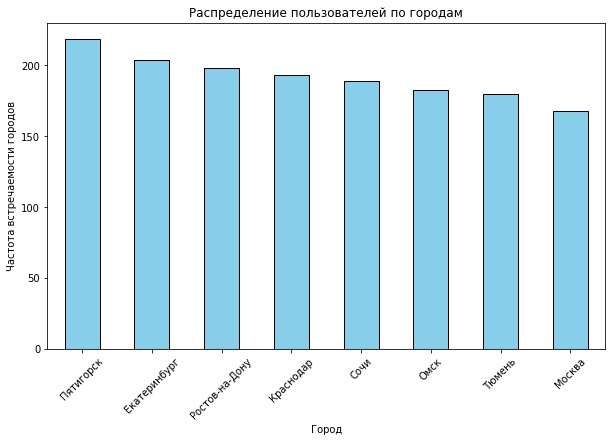

In [22]:
# Визуализируем распеределение пользователей по городам
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Распределение пользователей по городам')
plt.xlabel('Город')
plt.ylabel('Частота встречаемости городов')
plt.xticks(rotation=45)
plt.show()

Количество пользователей по городам варьируется от 168 до 219. Пятигорск занимает первое место с 219 пользователями. Екатеринбург на втором месте с 204 пользователями.Эти два города значительно опережают остальные по численности пользователей. Ростов-на-Дону , Краснодар , Сочи , Омск и Тюмень имеют схожее количество пользователей (от 180 до 198). Разница между этими городами небольшая, что говорит о равномерном распределении пользователей в этих городах. Москва, несмотря на то, что является крупнейшим городом России, имеет наименьшее количество пользователей (168).

Уделим внимание анализу причин низкой популярности сервиса в Москве.
Изучить успешные практики в Пятигорске и Екатеринбурге для применения в других городах.

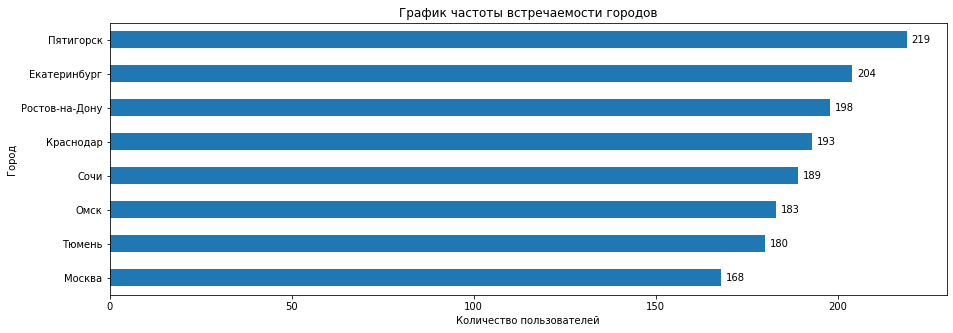

In [23]:
# Комментарий ревьюера
import matplotlib.pyplot as plt
import pandas as pd

# Создаем копию датасета, что бы не работать с исходным
tmp = users.copy()

# Построение горизонтальной диаграммы
ax = tmp['city'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(15, 5),
    title='График частоты встречаемости городов'
)

# Добавление значений рядом со столбцами
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Добавление меток осей
plt.xlabel('Количество пользователей')
plt.ylabel('Город')

# Отображение графика
plt.show()

3.2 Подсчитаем количество пользователей с разными типами подписок

Соотношение пользователей с подпиской и без подписки:
free     835
ultra    699
Name: subscription_type, dtype: int64


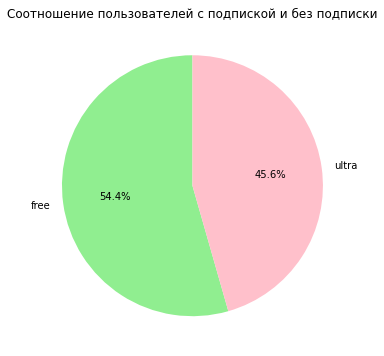

In [24]:
# Подсчитаем количество пользователей с разными типами подписок
subscription_counts = users['subscription_type'].value_counts()

# Выведим на экран статистики
print("Соотношение пользователей с подпиской и без подписки:")
print(subscription_counts)

# Визуализируем соотношение пользователей с подпиской и без подписки
plt.figure(figsize=(8, 6))
subscription_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'pink'], startangle=90)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('')
plt.show()

Большинство пользователей (54.4 %) предпочитают бесплатную подписку (free).
Это может быть связано с тем, что бесплатная подписка более доступна для широкой аудитории. Возможно пользователи могут быть не готовы платить за подписку или предпочитают попробовать сервис бесплатно.

Платная подписка (ultra) используется меньшим количеством пользователей (45.6%).
Возможно, это связано с высокой стоимостью подписки, недостаточной информированностью пользователей о преимуществах платной подписки, отсутствием значительной разницы в условиях между free и ultra.

3.3 Опишем и визуализируем возраст пользователей.

Описательная статистика возраста:
count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


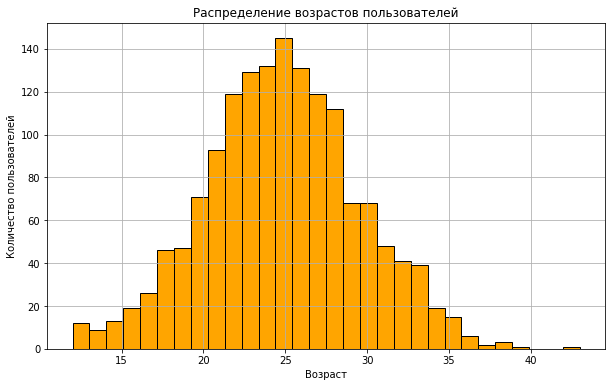

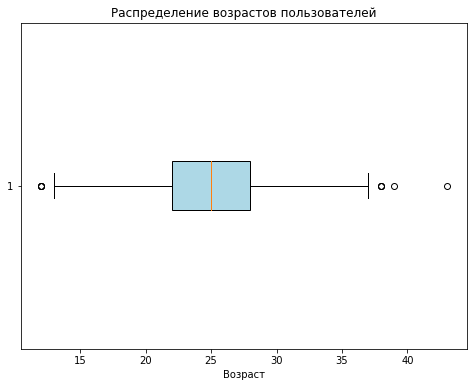

In [25]:
# Проверим в датафрейме users распределение возрастов пользователей
age_stats = users['age'].describe()
print("Описательная статистика возраста:")
print(age_stats)

# Гистограмма распределения возрастов
plt.figure(figsize=(10, 6))
users['age'].hist(bins=30, color='orange', edgecolor='black')
plt.title('Распределение возрастов пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

# Проанализируем выбросы
plt.figure(figsize=(8, 6))
plt.boxplot(users['age'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Распределение возрастов пользователей')
plt.xlabel('Возраст')
plt.show()

Средний возраст (mean) составляет около 25 лет, основная аудитория сервиса — молодые люди. Стандартное отклонение (std) равно 4.55 года, что говорит о том, что возраст пользователей относительно сконцентрирован вокруг среднего значения. Можно наблюдать несколько выбросов данных в районе 12 лет и 40 лет. Таким образом минимальный возраст (min) равен 12 лет, максимальный возраст (max) равен 43 года. Возрастной диапазон пользователей составляет от 12 до 43 лет. 

3.4 Опишем и визуализируем расстояние, которое пользователь преодолел за одну поездку.

Cтатистика расстояний:
count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64


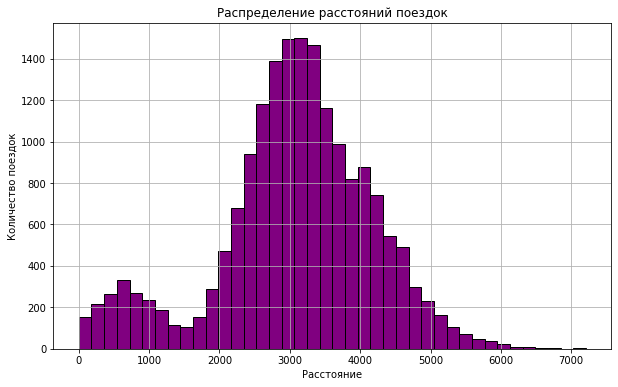

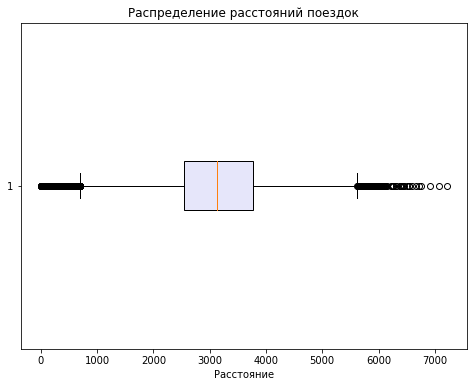

In [26]:
# Визуализируем расстояние, которое пользователь преодолел за одну поездку.
distance_stats = rides['distance'].describe()
print("Cтатистика расстояний:")
print(distance_stats)

# Гистограмма распределения расстояний
plt.figure(figsize=(10, 6))
rides['distance'].hist(bins=40, color='purple', edgecolor='black')
plt.title('Распределение расстояний поездок')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show()

# Анализ выбросов
plt.figure(figsize=(8, 6))
plt.boxplot(rides['distance'], vert=False, patch_artist=True, boxprops=dict(facecolor='lavender'))
plt.title('Распределение расстояний поездок')
plt.xlabel('Расстояние')
plt.show()

Среднее расстояние (mean) составляет 3070.7 м, примерно равно 3.1 км. Медиана (50%) равна 3133.6 м, что также близко к среднему значению. Умеренное стандартное отклонение (1116.8 м ) указывает на то, что большинство поездок сосредоточены вокруг среднего значения (3.1 км). Наибольшее количество поездок приходится на расстояния около 2500–4000 м. Это удобная дистанция для самокатов, которая подходит для повседневных поездок (например, до работы, магазина или метро).

Распределение близко к нормальному, но имеет небольшую асимметрию в сторону больших значений (правосторонняя асимметрия). Выбросы: небольшое количество поездок имеют очень большие расстояния (более 5000 м), что видно по хвосту гистограммы.

Минимальное расстояние (0.9 м ) может быть вызвано ошибками или тестовыми поездками. Рекомендуется проверить такие данные на наличие аномалий.
Максимальное расстояние (7.2 км ) показывает, что сервис используется и для более дальних маршрутов.

Рекомендации:
Проанализировать короткие поездки на предмет технических ошибок или неправильного использования сервиса. Оптимизировать зоны размещения самокатов, чтобы они были доступны для типичных расстояний (2.5–4.0 км).


3.5 Опишем и визуализируем продолжительность поездок.

Статистика продолжительности поездок:
count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


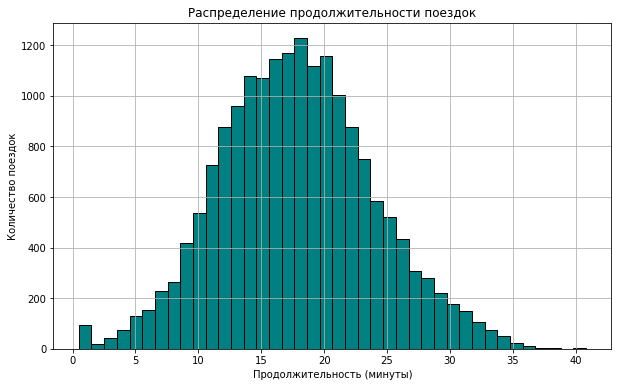

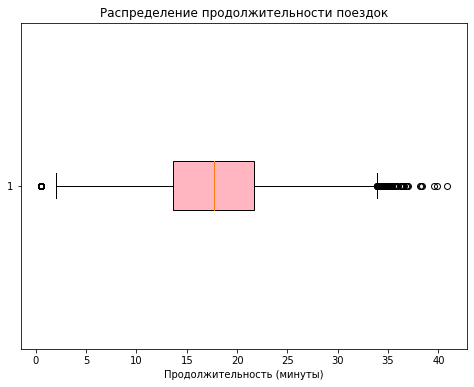

In [27]:
# Статистика продолжительности поездок
duration_stats = rides['duration'].describe()
print("Статистика продолжительности поездок:")
print(duration_stats)

# Гистограмма распределения продолжительности поездок
plt.figure(figsize=(10, 6))
rides['duration'].hist(bins=40, color='teal', edgecolor='black')
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.show()

# Анализ выбросов в продолжительности поездок
plt.figure(figsize=(8, 6))
plt.boxplot(rides['duration'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightpink'))
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (минуты)')
plt.show()

Всего в данных представлено 18068 поездок. Большинство поездок находятся в диапазоне 13.6–21.7 минут, что соответствует повседневным поездкам. Умеренное стандартное отклонение (6.1 мин ) указывает на то, что большинство поездок сосредоточены вокруг среднего значения (17.8 мин).

Пик плотности: наибольшее количество поездок приходится на продолжительность около 17–20 минут. 
Симметрия: распределение близко к нормальному, но имеет небольшую асимметрию в сторону больших значений (правосторонняя асимметрия).
Выбросы: небольшое количество поездок имеют очень большую продолжительность (более 30 минут), что видно по хвосту гистограммы.

Минимальная продолжительность (0.5 мин) может быть вызвана ошибками или тестовыми поездками. Рекомендуется проверить такие данные на наличие аномалий.
Максимальная продолжительность (40.8 мин ) показывает, что сервис используется и для более длительных маршрутов.

Рекомендации:
Проанализировать короткие поездки (меньше 1 минуты) на предмет технических ошибок или неправильного использования сервиса. Изучить причины длинных поездок (более 30 минут), чтобы понять, как можно улучшить сервис для таких маршрутов (например, увеличить запас хода самокатов).
Оптимизировать зоны размещения самокатов, чтобы они были доступны для типичных маршрутов (13.6–21.7 минут).

#### Шаг 4. Объединение данных

4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. 

In [28]:
# Объединим users и subscriptions по subscription_type
merged_data = users.merge(subscriptions, on='subscription_type', how='left')

# Добавим данные о поездках rides по user_id
final_data = merged_data.merge(rides, on='user_id', how='left')

# Выведим первые строки объединенного датафрейма
print(final_data.head())

   user_id  name  age    city subscription_type  minute_price  \
0        1  Кира   22  Тюмень             ultra             6   
1        1  Кира   22  Тюмень             ultra             6   
2        1  Кира   22  Тюмень             ultra             6   
3        1  Кира   22  Тюмень             ultra             6   
4        1  Кира   22  Тюмень             ultra             6   

   start_ride_price  subscription_fee  distance   duration       date  month  
0                 0               199   4409.92  25.599769 2021-01-01      1  
1                 0               199   2617.59  15.816871 2021-01-18      1  
2                 0               199    754.16   6.232113 2021-04-20      4  
3                 0               199   2694.78  18.511000 2021-08-11      8  
4                 0               199   4028.69  26.265803 2021-08-28      8  


In [29]:
# Проверяем размерность датасета
print("Размерность final_data:", final_data.shape)

Размерность final_data: (18068, 12)


Сравним размерность final_data с исходными датафреймами (users, subscriptions, rides). Количество строк в final_data не отличается от количества строк в датафрейме rides (18068). В объединенном датафрейме 12 столбцов.

In [30]:
# Проверяем количество пропусков в каждом столбце
print("Пропуски в final_data:")
print(final_data.isnull().sum())

Пропуски в final_data:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
distance             0
duration             0
date                 0
month                0
dtype: int64


Во всех столбцах количество пропусков равно 0, что означает, что данные полные.

In [31]:
# Проверим типы данных
print("Типы данных в final_data:")
print(final_data.dtypes)

Типы данных в final_data:
user_id                       int64
name                         object
age                           int64
city                         object
subscription_type            object
minute_price                  int64
start_ride_price              int64
subscription_fee              int64
distance                    float64
duration                    float64
date                 datetime64[ns]
month                         int64
dtype: object


Все столбцы имеют корректные типы данных. Это позволяет выполнять дальнейший анализ без преобразований.

In [32]:
# Проверка диапазонов значений
print("Минимальный и максимальный возраст:", final_data['age'].min(), final_data['age'].max())
print("Минимальная и максимальная стоимость минуты:", final_data['minute_price'].min(), final_data['minute_price'].max())
print("Минимальная и максимальная стоимость старта:", final_data['start_ride_price'].min(), final_data['start_ride_price'].max())
print("Минимальная и максимальная абонентская плата:", final_data['subscription_fee'].min(), final_data['subscription_fee'].max())
print("Минимальное и максимальное расстояние:", final_data['distance'].min(), final_data['distance'].max())
print("Минимальная и максимальная продолжительность:", final_data['duration'].min(), final_data['duration'].max())
print("Минимальный и максимальный месяц:", final_data['month'].min(), final_data['month'].max())

Минимальный и максимальный возраст: 12 43
Минимальная и максимальная стоимость минуты: 6 8
Минимальная и максимальная стоимость старта: 0 50
Минимальная и максимальная абонентская плата: 0 199
Минимальное и максимальное расстояние: 0.86 7211.01
Минимальная и максимальная продолжительность: 0.5 40.82396261922424
Минимальный и максимальный месяц: 1 12


Все значения находятся в допустимых диапазонах.

In [33]:
# Проверка уникальных значений
print("Уникальные значения subscription_type:", final_data['subscription_type'].unique())
print("Уникальные значения city:", final_data['city'].unique())

Уникальные значения subscription_type: ['ultra' 'free']
Уникальные значения city: ['Тюмень' 'Омск' 'Москва' 'Ростов-на-Дону' 'Краснодар' 'Пятигорск'
 'Екатеринбург' 'Сочи']


Проверка уникальных значений в subscription_type после объединения показала 2 типа подписки: 'ultra' и 'free', а в city наблюдаем 8 городов России. Двигаемся дальше.

4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1: 

In [34]:
# Данные о пользователях без подписки
free_users = final_data[final_data['subscription_type'] == 'free']

# Данные о пользователях с подпиской
ultra_users = final_data[final_data['subscription_type'] == 'ultra']

# Вывод первых строк для проверки
print("Пользователи без подписки:")
print(free_users.head())

print("\nПользователи с подпиской:")
print(ultra_users.head())

Пользователи без подписки:
      user_id   name  age  city subscription_type  minute_price  \
6500      700  Айдар   22  Омск              free             8   
6501      700  Айдар   22  Омск              free             8   
6502      700  Айдар   22  Омск              free             8   
6503      700  Айдар   22  Омск              free             8   
6504      700  Айдар   22  Омск              free             8   

      start_ride_price  subscription_fee  distance   duration       date  \
6500                50                 0   2515.69  14.944286 2021-01-02   
6501                50                 0    846.93  16.234663 2021-02-01   
6502                50                 0   4004.43  20.016628 2021-02-04   
6503                50                 0   1205.91   9.782872 2021-02-10   
6504                50                 0   3047.38  17.427673 2021-02-14   

      month  
6500      1  
6501      2  
6502      2  
6503      2  
6504      2  

Пользователи с подпиской:
  

Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

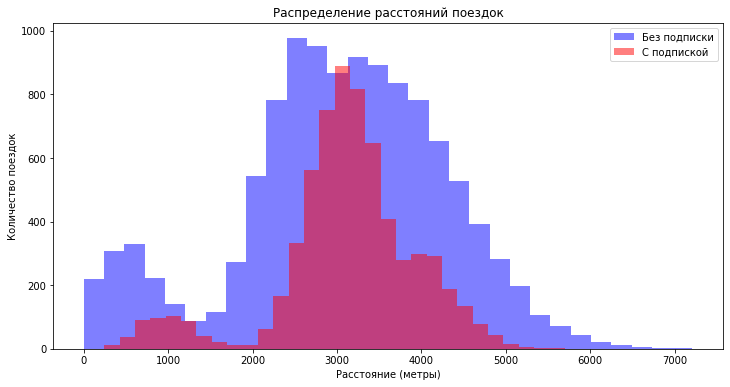

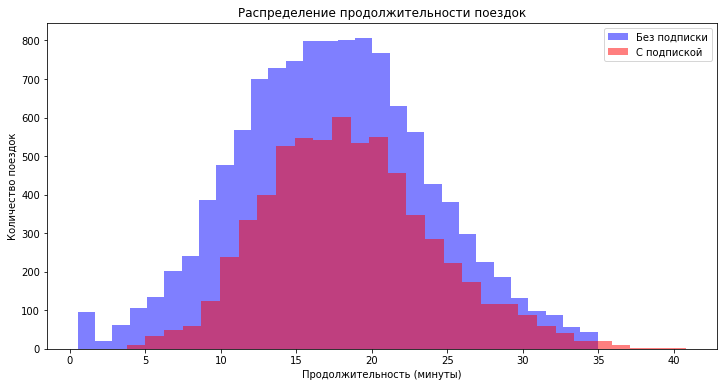

In [35]:
# Гистограмма расстояний для обеих групп
plt.figure(figsize=(12, 6))

# Пользователи без подписки
plt.hist(free_users['distance'], bins=30, alpha=0.5, label='Без подписки', color='blue')

# Пользователи с подпиской
plt.hist(ultra_users['distance'], bins=30, alpha=0.5, label='С подпиской', color='red')

plt.title('Распределение расстояний поездок')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Количество поездок')
plt.legend() # Добавляем легенду для наглядного сравнения двух групп.
plt.show()

# Гистограмма продолжительности поездок для обеих групп
plt.figure(figsize=(12, 6))

# Пользователи без подписки
plt.hist(free_users['duration'], bins=30, alpha=0.5, label='Без подписки', color='blue')

# Пользователи с подпиской
plt.hist(ultra_users['duration'], bins=30, alpha=0.5, label='С подпиской', color='red')

plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.legend() # Добавляем легенду для наглядного сравнения двух групп.
plt.show()

Анализ распределения расстояний поездок (первый график).
Основной пик распределения приходится на 2000-4000 метров.
Пользователи без подписки (синий) по сравнению с пользователями с подпиской (красный) совершают больше коротких поездок (до 1000 м). Пользователи с подпиской (красный) делают меньше коротких поездок, но их средняя дистанция примерно такая же как у пользователей без подписки (синий).
Вывод: подписка незначительно влияет на расстояние поездки – пользователи обеих групп ездят примерно одинаковые дистанции.

Анализ распределения продолжительности поездок (второй график)
Основной пик поездок – 10-25 минут.
Пользователи без подписки (синий) совершают больше коротких поездок (до 10 минут). 
Пользователи с подпиской (красный) реже делают короткие поездки, но их общее распределение очень похоже.
Вывод: подписка не влияет на время поездки так же сильно, как можно было бы ожидать. Однако пользователи без подписки чаще совершают очень короткие поездки.

#### Шаг 5. Подсчёт выручки

5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными.

In [ ]:
# Округление продолжительности поездок перед суммированием
final_data['duration'] = np.ceil(final_data['duration'])

# Группируем данные по user_id, month и subscription_type
aggregated_data = final_data.groupby(['user_id', 'month', 'subscription_type']).agg(
    total_distance=('distance', 'sum'),               # Суммарное расстояние
    trip_count=('distance', 'count'),                 # Количество поездок
    total_duration=('duration', 'sum'),               # Суммарное время (после округления!)
    start_ride_price=('start_ride_price', 'first'),   # Стоимость старта поездки
    minute_price=('minute_price', 'first'),           # Стоимость минуты
    subscription_fee=('subscription_fee', 'first')    # Абонентская плата
).reset_index()

# Выведим первые строки агрегированного датафрейма
print(aggregated_data.head())

   user_id  month subscription_type  total_distance  trip_count  \
0        1      1             ultra         7027.51           2   
1        1      4             ultra          754.16           1   
2        1      8             ultra         6723.47           2   
3        1     10             ultra         5809.91           2   
4        1     11             ultra         7003.50           3   

   total_duration  start_ride_price  minute_price  subscription_fee  
0            42.0                 0             6               199  
1             7.0                 0             6               199  
2            46.0                 0             6               199  
3            32.0                 0             6               199  
4            56.0                 0             6               199  


Комментарий студента: проверим пропуски в созданной сводной таблице aggregated_data.

In [37]:
# Проверяем пропуски в созданной сводной таблице
print("Пропуски в aggregated_data:")
print(aggregated_data.isnull().sum())

Пропуски в aggregated_data:
user_id              0
month                0
subscription_type    0
total_distance       0
trip_count           0
total_duration       0
start_ride_price     0
minute_price         0
subscription_fee     0
dtype: int64


Во всех столбцах количество пропусков равно 0, что означает, что данные полные.

5.2 Добавим в этот же датафрейм столбец с помесячной выручкой, которую принёс каждый пользователь.

In [38]:
# Корректный расчет выручки

# Пользователи без подписки (учитываем все платежи)
aggregated_data.loc[aggregated_data['subscription_type'] == 'free', 'revenue'] = (
    aggregated_data['trip_count'] * aggregated_data['start_ride_price'] +  
    aggregated_data['total_duration'] * aggregated_data['minute_price']
)

# Пользователи с подпиской (не учитываем старт поездки, но добавляем абонплату)
aggregated_data.loc[aggregated_data['subscription_type'] == 'ultra', 'revenue'] = (
    aggregated_data['total_duration'] * aggregated_data['minute_price'] + 
    aggregated_data['subscription_fee']
)

# Проверяем исправленный результат
print(aggregated_data.head())

   user_id  month subscription_type  total_distance  trip_count  \
0        1      1             ultra         7027.51           2   
1        1      4             ultra          754.16           1   
2        1      8             ultra         6723.47           2   
3        1     10             ultra         5809.91           2   
4        1     11             ultra         7003.50           3   

   total_duration  start_ride_price  minute_price  subscription_fee  revenue  
0            42.0                 0             6               199    451.0  
1             7.0                 0             6               199    241.0  
2            46.0                 0             6               199    475.0  
3            32.0                 0             6               199    391.0  
4            56.0                 0             6               199    535.0  


In [39]:
# Комментарий ревьюера
# Контроль суммы выручки
tmp, col_rev = aggregated_data.copy(), 'revenue'
print("Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице:", tmp[col_rev].sum())

Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице: 3878641.0


In [40]:
# Вычисляем общую сумму выручки после исправлений
total_revenue = aggregated_data['revenue'].sum()

# Вывод результата
print(f"Общая сумма выручки: {total_revenue:.2f}")

Общая сумма выручки: 3878641.00


После исправлений общая сумма выручки теперь полностью совпадает с правильным значением суммы выручки 3878641.

#### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? 
Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. 
Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Формулировка гипотез:

Нулевая гипотеза (H₀): Среднее время поездки одинаково для пользователей с подпиской и без подписки (равны).

Альтернативная гипотеза (H₁): Среднее время поездки для пользователей с подпиской больше, чем для пользователей без подписки.

In [41]:
# Данные о продолжительности поездок
free_durations = free_users['duration']
ultra_durations = ultra_users['duration']

# Шаг 1: Проверка равенства дисперсий (тест Левена)
levene_test = levene(free_durations, ultra_durations)
print(f"Тест Левена: p-value = {levene_test.pvalue:.5f}")

# Определяем параметр equal_var на основе теста Левена
equal_var_assumption = levene_test.pvalue > 0.05  # Если p > 0.05, дисперсии равны

# Шаг 2: Односторонний t-тест для независимых выборок
t_stat, p_value = ttest_ind(ultra_durations, free_durations, equal_var=equal_var_assumption, alternative='greater')

# Вывод результатов
print(f"T-статистика: {t_stat:.3f}")
print(f"p-значение: {p_value:.5f}")

# Шаг 3: Интерпретация результата
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки.")
else:
    print("Не отвергаем нулевую гипотезу: существенной разницы в времени поездок нет.")


Тест Левена: p-value = 0.00000
T-статистика: 12.683
p-значение: 0.00000
Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки.


Комментарий студента:

Анализ результатов:

Тест Левена (p-value = 0.00000):
p-value меньше 0.05, что означает, что дисперсии двух выборок существенно различаются.
В T-тесте использовалась настройка equal_var=False, что корректно учитывает разницу дисперсий.

T-статистика (12.683):
Большое положительное значение говорит о значительной разнице в средней продолжительности поездок между пользователями с подпиской и без подписки.

p-value (0.00000):
p-value значительно меньше уровня значимости (0.05), что означает, что разница статистически значима.

Комментарий студента 2:

Вывод:

Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки. Результаты статистически значимы, что подтверждает важность подписочной модели для бизнеса.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. 
Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает  3130 метров? Проверим гипотезу и сделаем выводы.

Комментарий студента: сформулируем нулевую и альтернативную гипотезы.

Нулевая гипотеза:
Среднее расстояние одной поездки для пользователей с подпиской не превышает 3130 метров.

Альтернативная гипотеза:
Среднее расстояние одной поездки для пользователей с подпиской превышает 3130 метров.

Комментарий студента:

Нулевая гипотеза: μ ≤ 3130

Среднее расстояние одной поездки для пользователей с подпиской не превышает (меньше либо равно) 3130 метров.

Альтернативная гипотеза: μ>3130

Среднее расстояние одной поездки для пользователей с подпиской превышает (больше) 3130 метров.

In [42]:
# Фильтруем данные: среднее расстояние одной поездки для пользователей с подпиской
ultra_trip_distances = final_data[final_data['subscription_type'] == 'ultra']['distance']

# Проверка на количество наблюдений
n = len(ultra_trip_distances)

# Проведение одновыборочного t-теста
t_stat, p_value = stats.ttest_1samp(ultra_trip_distances, popmean=3130, alternative='greater')

# Вывод результатов
print(f"Количество наблюдений: {n}")
print(f"T-статистика: {t_stat:.3f}")
print(f"p-значение: {p_value:.5f}")

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: среднее расстояние действительно превышает 3130 метров.")
else:
    print("Не отвергаем нулевую гипотезу: среднее расстояние не превышает 3130 метров.")

Количество наблюдений: 6500
T-статистика: -1.402
p-значение: 0.91954
Не отвергаем нулевую гипотезу: среднее расстояние не превышает 3130 метров.


Интерпретация результата:

T-статистика = -1.402 это означает, что среднее расстояние меньше 3130 метров (отрицательное значение указывает на это).
p-значение = 0.91954 → намного больше 0.05, значит, у нас нет оснований отвергать нулевую гипотезу.

Вывод: среднее расстояние поездки пользователей с подпиской не превышает 3130 метров.

Это означает, что подписчики не эксплуатируют самокаты больше, чем в среднем безопасно (с точки зрения износа). Возможно, это связано с их пользовательским поведением: они могут ездить на более короткие расстояния, но делать это чаще.

6.3 Проверим гипотезу и сделаем вывод.
Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Комментарий студента:

Нулевая гипотеза: средняя помесячная выручка от пользователей с подпиской не превышает (меньше либо равно) среднюю помесячную выручку от пользователей без подписки.

H0: μ подписчики ≤ μ без подписки

Альтернативная гипотеза: средняя помесячная выручка от пользователей с подпиской больше, чем у пользователей без подписки.

HA: μ подписчики > μ без подписки

In [43]:
# Формируем выборки
revenue_free = aggregated_data[aggregated_data['subscription_type'] == 'free']['revenue']
revenue_ultra = aggregated_data[aggregated_data['subscription_type'] == 'ultra']['revenue']

# Проверяем равенство дисперсий для корректного выбора параметра equal_var
levene_test = levene(revenue_free, revenue_ultra)
print(f"Тест Левена на равенство дисперсий: p-value = {levene_test.pvalue}")

# Выбираем параметр equal_var в зависимости от p-value теста Левена
equal_var_assumption = levene_test.pvalue > 0.05  # Если p > 0.05, дисперсии равны

# Запускаем t-тест
t_stat, p_value = ttest_ind(revenue_ultra, revenue_free, equal_var=equal_var_assumption, alternative='greater')

# Выводим результаты
print(f"T-статистика: {t_stat:.3f}")
print(f"p-значение: {p_value:.5f}")

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средняя помесячная выручка от подписчиков выше.")
else:
    print("Не отвергаем нулевую гипотезу: средняя помесячная выручка от подписчиков НЕ выше.")

Тест Левена на равенство дисперсий: p-value = 1.588903062876513e-272
T-статистика: 13.202
p-значение: 0.00000
Отвергаем нулевую гипотезу: средняя помесячная выручка от подписчиков выше.


Комментарий студента:


Интерпретация результатов:

Тест Левена:
p-значение практически равно 0, что говорит о том, что дисперсии двух выборок существенно различаются.
Из-за этого при проведении t-теста использовалась настройка equal_var=False, чтобы учесть разницу дисперсий.

T-статистика (13.202):
Большое положительное значение T-статистики показывает, что средняя помесячная выручка от подписчиков значительно выше, чем у пользователей без подписки.

p-значение (0.00000):
p-значение значительно меньше уровня значимости (α=0.05), что означает, что разница между выборками статистически значима.

Мы отвергаем нулевую гипотезу и принимаем альтернативную гипотезу.

Вывод:

Средняя помесячная выручка от пользователей с подпиской значительно выше, чем у пользователей без подписки. 
Это подтверждено статистически с высокой степенью уверенности.

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, 
с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку
значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ:
Для проверки гипотезы о том, что количество обращений в техподдержку значимо снизилось после обновления серверов, нам понадобится парный статистический тест (парный t-тест или критерий знаковых рангов Уилкоксона). Это связано с тем, что данные содержат информацию о количестве обращений для каждого пользователя до и после обновления, то есть наблюдения зависимы (связаны между собой). Этот подход учитывает зависимость данных (до и после обновления для каждого пользователя) и позволяет сделать корректные выводы.

Комментарий студента:

В данном случае гипотеза односторонняя, потому что нас интересует только снижение количества обращений.

Нулевая гипотеза (H₀): среднее количество обращений не уменьшилось после обновления (либо осталось таким же, либо увеличилось).

Альтернативная гипотеза (H₁): среднее количество обращений уменьшилось после обновления.

#### Шаг 7. Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. 

Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Решение задачи:
Будем использовать биномиальное распределение, которое описывает количество успехов в серии независимых испытаний. В нашем случае:
"Успех" — это пользователь, который продлевает подписку после бесплатного пробного периода.
Вероятность успеха p=0.1 (10 %).
Необходимо найти минимальное количество промокодов N, чтобы вероятность не выполнить план (менее 100 продлений) была примерно 5 % (P(X<100)≤0.05).

Минимальное количество промокодов: 1161


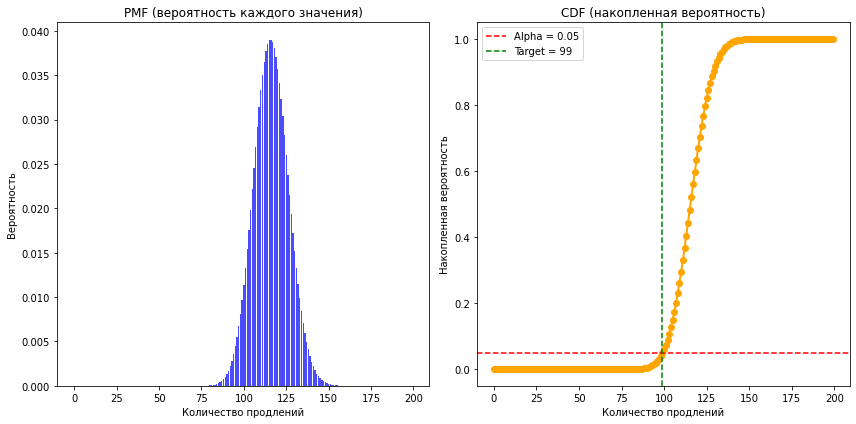

In [44]:
# Задаем параметры
p = 0.1  # Вероятность успеха
target_successes = 100  # Минимальное количество продлений
alpha = 0.05  # Допустимая вероятность не выполнить план

# Функция для поиска минимального N
def find_min_N(p, target_successes, alpha):
    N = target_successes  # Начинаем с минимального значения
    while True:
        # Вычисляем вероятность P(X < 100)
        prob_less_than_target = binom.cdf(target_successes - 1, N, p)
        if prob_less_than_target <= alpha:
            return N
        N += 1
        
# Находим минимальное N
min_N = find_min_N(p, target_successes, alpha)
print(f"Минимальное количество промокодов: {min_N}")

# График распределения для найденного N
x = np.arange(0, target_successes * 2)  # Диапазон значений для графика
pmf_values = binom.pmf(x, min_N, p)  # Функция вероятности массы
cdf_values = binom.cdf(x, min_N, p)  # Функция кумулятивного распределения

# Построение графиков
plt.figure(figsize=(12, 6))

# График PMF
plt.subplot(1, 2, 1)
plt.bar(x, pmf_values, color='blue', alpha=0.7)
plt.title('PMF (вероятность каждого значения)')
plt.xlabel('Количество продлений')
plt.ylabel('Вероятность')

# График CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf_values, color='orange', marker='o', linestyle='-', linewidth=2)
plt.axhline(y=alpha, color='red', linestyle='--', label=f'Alpha = {alpha}')
plt.axvline(x=target_successes - 1, color='green', linestyle='--', label=f'Target = {target_successes - 1}')
plt.title('CDF (накопленная вероятность)')
plt.xlabel('Количество продлений')
plt.ylabel('Накопленная вероятность')
plt.legend()

plt.tight_layout()
plt.show()

Ответ:
Минимальное количество промокодов: для достижения плана (минимум 100 продлений) с вероятностью не выполнить план около 5 % необходимо разослать 1161 промокод . Это значение гарантирует, что маркетинговая акция выполнит свои цели с высокой вероятностью.
Вероятность того, что менее 100 пользователей продлят подписку, составляет около 5 %, что соответствует заданному уровню значимости.

Поведение пользователей:
Ожидаемое количество продлений составляет около 1161×0.1=116.1, что близко к целевому значению (100).
Большинство значений сконцентрировано в районе этого значения, что говорит о том, что модель адекватно описывает поведение пользователей.

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность того, что уведомление откроют не более 399500 пользователей: 0.1540


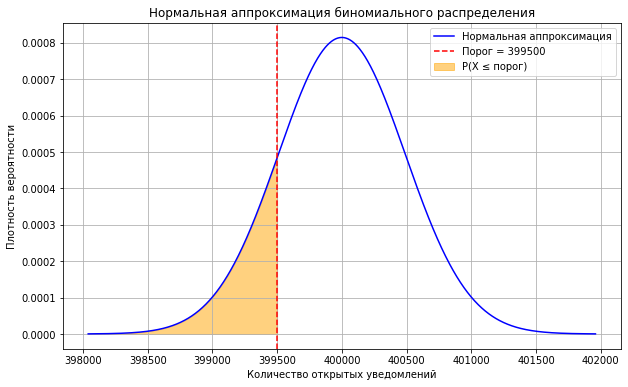

In [45]:
# Параметры задачи
N = 1_000_000  # Количество отправленных уведомлений
p = 0.4        # Вероятность открытия уведомления
threshold = 399_500  # Пороговое значение

# Вычисляем параметры нормального распределения
mu = N * p
sigma = np.sqrt(N * p * (1 - p))

# Применяем поправку на непрерывность
z_score = (threshold + 0.5 - mu) / sigma

# Вычисляем вероятность с помощью CDF
probability = norm.cdf(z_score)

print(f"Вероятность того, что уведомление откроют не более {threshold} пользователей: {probability:.4f}")

# Построим график нормальной аппроксимации
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)  # Диапазон значений для графика
pdf_values = norm.pdf(x, loc=mu, scale=sigma)          # Функция плотности вероятности

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, label='Нормальная аппроксимация', color='blue')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Порог = {threshold}')
plt.fill_between(x, pdf_values, where=(x <= threshold), color='orange', alpha=0.5, label='P(X ≤ порог)')
plt.title('Нормальная аппроксимация биномиального распределения')
plt.xlabel('Количество открытых уведомлений')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

Пик плотности вероятности: находится около ожидаемого значения (μ=400,000), что соответствует теоретическому значению.
Распределение: график показывает симметричное распределение вокруг пика, что характерно для нормального распределения.
Заштрихованная область: определяет вероятность того, что количество открытых уведомлений будет не более 399,500.

Маловероятное событие: вероятность того, что уведомление откроют не более 399,500 пользователей, составляет всего 15.40 %. Это указывает на то, что такое событие является относительно маловероятным, так как ожидаемое количество открытых уведомлений (μ=400,000) значительно выше порогового значения.

Статистическая уверенность:
Использование нормальной аппроксимации позволяет быстро и точно оценить вероятность интересующего события.
График наглядно демонстрирует, что большая часть значений сконцентрирована в районе ожидаемого значения, а заштрихованная область занимает небольшую часть под кривой.

Поведение пользователей:
Ожидаемое количество открытых уведомлений составляет около 400,000, что соответствует теоретическому значению.
Большинство значений сконцентрировано в районе этого значения, что говорит о том, что модель адекватно описывает поведение пользователей.

Рекомендации:
Если отдел маркетинга хочет минимизировать риск недостижения целевого количества открытых уведомлений, стоит рассмотреть дополнительные меры для повышения вовлеченности пользователей. Например, можно использовать более привлекательные заголовки или содержание уведомлений, чтобы повысить вероятность их открытия.

Выводы по исследованию:

В ходе анализа данных сервиса аренды самокатов GoFast были проведены различные исследования, направленные на понимание поведения пользователей и проверку гипотез, которые могут помочь компании повысить эффективность работы и увеличить доход.

Пользовательская база:

В сервисе зарегистрировано 1565 пользователей из 8 городов России.
Большинство пользователей (54,4%) используют бесплатную версию, тогда как 45,6% оформляют платную подписку.
Средний возраст пользователей — 25 лет, но есть несовершеннолетние (12 лет), что нарушает законодательные нормы аренды самокатов.

Поведение пользователей:

Средняя продолжительность поездки составляет 17,8 минут, а средняя дистанция — 3,1 км.
Пользователи без подписки чаще совершают короткие поездки, тогда как подписчики более склонны к поездкам средней и большой продолжительности. Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки. Результаты подтверждает важность подписочной модели для бизнеса.

Финансовый анализ и выручка:

Средняя помесячная выручка от подписчиков значительно выше, чем от пользователей без подписки. Это доказывает, что подписочная модель выгоднее для компании. Подписчики совершают более длительные поездки, что повышает использование самокатов и потенциальную выручку. Так как среднее расстояние одной поездки подписчиков не превышает 3130 метров, это означает, что они не перегружают самокаты сверх нормы износа. 

Маркетинговые инсайты:

Почти 55% пользователей выбирают бесплатный тариф. Это говорит о потенциале роста конверсии в подписку и необходимости донести до пользователей ценность подписки. Для успешного проведения акции с промокодами необходимо разослать минимум 1161 промокодов, чтобы с вероятностью 95% подписку продлили не менее 100 пользователей. Промокоды эффективны, но не дают высокой конверсии (10%). 

Точки роста и улучшения:

Улучшить описание преимуществ подписки и предложить тестовые периоды для новых пользователей.
Чтобы повысить корверсию промокодов можно протестировать улучшенные условия (например, «1 месяц бесплатно + скидка 50% на следующий»).
Популярность сервиса в Москве самая низкая. Провести анализ конкурентной среды Москвы и разработать локальные маркетинговые стратегии. Возможно, сильная конкуренция, неудобные зоны парковки или отсутствие эффективного маркетинга. Требуется более глубокий анализ.
Наличие пользователей младше 18 лет может привести к штрафам и репутационным рискам. Необходимо внедрить проверку возраста при регистрации (например, с помощью загрузки документов).

Рекомендации для бизнеса:

Развивать подписочную модель, так как подписчики тратят больше времени в поездках и приносят больше выручки.
Анализировать причины низкой популярности сервиса в Москве и применять успешные практики других городов.
Рассмотреть маркетинговые стратегии для повышения конверсии с бесплатной подписки на платную.
Диагностировать аномалии в данных, например, поездки продолжительностью 0,5 минуты с большим расстоянием.
Увеличить потенциал роста открываемости push-уведомлений за счет персонализации сообщений и A/B-тестов.